## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [406]:
# Your code here - remember to use markdown cells for comments as well!

In [407]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [408]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase2_project\\dsc-phase-2-project\\data\\kc_house_data.csv"
project2_raw_df = pd.read_csv(file_path)

In [409]:
project2_raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [410]:
project2_raw_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.
21 columns. (features)
21597 rows.

id: Unique ID for each home sold
date: Date of the home sale
price: Price of each home sold
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living: Square footage of the apartments interior living space
sqft_lot: Square footage of the land space
floors: Number of floors
waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not
view: An index from 0 to 4 of how good the view of the property was
condition: - An index from 1 to 5 on the condition of the apartment,
grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above: The square footage of the interior housing space that is above ground level
sqft_basement: The square footage of the interior housing space that is below ground level
yr_built: The year the house was initially built
yr_renovated: The year of the house’s last renovation
zipcode: What zipcode area the house is in
lat: Lattitude
long: Longitude
sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [411]:
project2_raw_df.shape

(21597, 21)

In [412]:
print(project2_raw_df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [413]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [414]:
project2_raw_df['date'] = pd.to_datetime(project2_raw_df['date'])

project2_raw_df['month'] = project2_raw_df['date'].apply(lambda date:date.month)
project2_raw_df['year'] = project2_raw_df['date'].apply(lambda date:date.year)

project2_raw_df = project2_raw_df.drop('date',axis=1)

# Check the new columns
print(project2_raw_df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


floors - Categorical Nominal feature 
waterfront - Categorical Nominal feature 
view - Categorical Ordinal feature 
condition - Categorical Ordinal feature 
grade - Categorical Ordinal feature 
bedrooms - Categorical Nominal feature 
bathrooms - Categorical Nominal feature

In [415]:
project2_raw_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [416]:
#project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].replace('?',int('555'))
project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].apply(lambda x: float(x.replace("?", "555")))
#project2_raw_df['sqft_basement'] = project2_raw_df.astype(int)

In [417]:
project2_raw_df['sqft_basement'] = project2_raw_df['sqft_basement'].apply(lambda x: float(x))


In [418]:
project2_raw_df['sqft_basement'].dtype

dtype('float64')

In [419]:
project2_raw_df['sqft_basement'].describe()
#project2_raw_df['sqft_basement'] = projeproject2_raw_df['sqft_basement']ct2_raw_df['sqft_basement'].map(lambda x: int(x.replace('?',basement_frequent)))
#project2_raw_df['sqft_basement']

count    21597.000000
mean       297.383479
std        439.446956
min          0.000000
25%          0.000000
50%          0.000000
75%        555.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [420]:
project2_raw_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

<AxesSubplot:xlabel='month'>

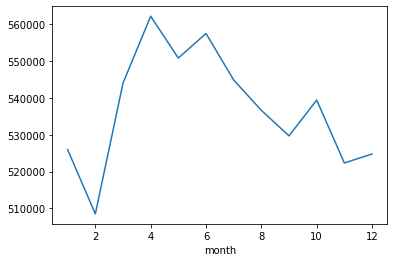

In [421]:
project2_raw_df.groupby('month').mean()['price']
project2_raw_df.groupby('month').mean()['price'].plot()

In [422]:
project2_raw_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [423]:
project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 'yes' if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 'no') 
project2_raw_df['seattle'].value_counts(normalize=True)

1    0.684308
0    0.315692
Name: seattle, dtype: float64

zipcode 98198, 98188, 98168, 98166. 98158, 98146, 98138, 98108 werent used as multicities were in the same area code. 0 count as seattle 1 count as non-seattle.

In [424]:
#fill na with no value and change yes to 1 n no to 0
project2_raw_df['waterfront'] = project2_raw_df['waterfront'].fillna(value = 'NO')
project2_raw_df['waterfront'] = project2_raw_df['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
project2_raw_df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [425]:
project2_raw_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [426]:
#fill na with no value & replace cateogrical rating with (0 to 4 scale. 0 -None, and 4 - excellent)
project2_raw_df['view'] = project2_raw_df['view'].fillna(value = 'NONE')
project2_raw_df['view'] = project2_raw_df['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
project2_raw_df['view'].value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [427]:
project2_raw_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [428]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
project2_raw_df['condition'] = project2_raw_df['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
project2_raw_df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [429]:
project2_raw_df['grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object>

In [430]:
# grab the numerical rating and assign it to interger type
project2_raw_df['new_grade'] = project2_raw_df['grade'].astype(str).str[0]
project2_raw_df['new_grade'] = project2_raw_df['new_grade'].astype(int)
project2_raw_df['new_grade'].dtype

dtype('int32')

In [431]:
# reduce the oullier bedrooms #33
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [432]:
project2_raw_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_df.info()

In [433]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [434]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda x : 'yes' if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 'no') 
project2_raw_df['seattle'].value_counts(normalize=True)

1    0.68434
0    0.31566
Name: seattle, dtype: float64

zipcode 98198, 98188, 98168, 98166. 98158, 98146, 98138, 98108 werent used as multicities were in the same area code. 0 count as seattle 1 count as non-seattle.

In [435]:
#project2_raw_df['zipcode'] = project2_raw_df.zipcode.astype('category')

In [436]:
project2_raw_df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
year                0
seattle             0
new_grade           0
dtype: int64

In [437]:
#project2_raw_df['seattle'] = project2_raw_df['zipcode'].apply(lambda code : 0 if code == 98101 else 1)
#project2_raw_df['seattle'].sum()

In [438]:
#project2_raw_df.shape

In [439]:
#project2_raw_df.info()

In [440]:
#project2_raw_df.nunique()

In [441]:
#project2_raw_df.info()

floors - Categorical Nominal feature
waterfront - Categorical Nominal feature
view - Categorical Ordinal feature
condition - Categorical Ordinal feature
grade - Categorical Ordinal feature
bedrooms - Categorical Nominal feature
bathrooms - Categorical Nominal feature

In [442]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
project2_raw_df['yr_renovated'] = project2_raw_df['yr_renovated'].fillna(value = 0)
project2_raw_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
seattle          0
new_grade        0
dtype: int64

<AxesSubplot:>

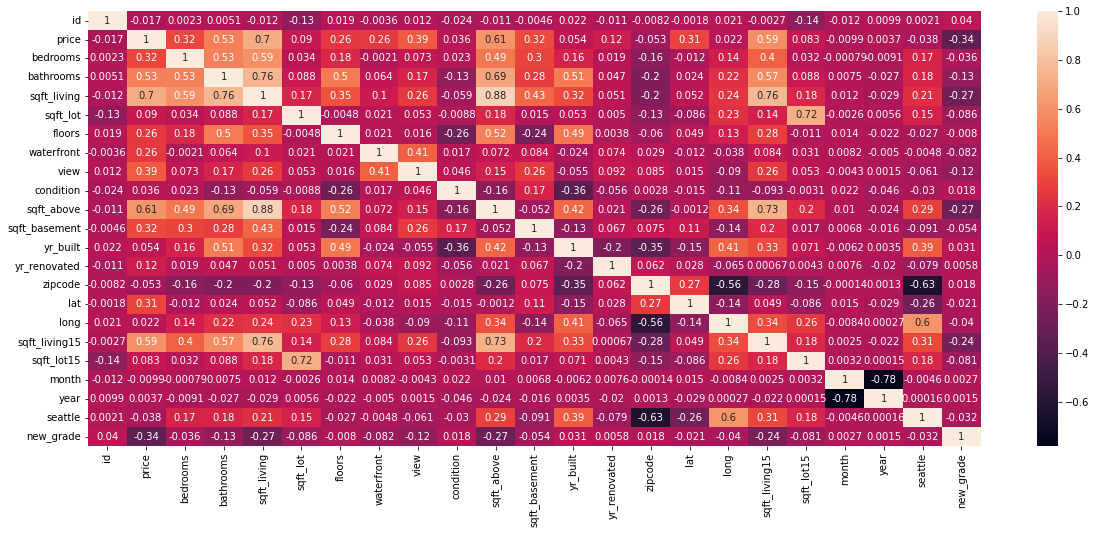

In [443]:
plt.figure(figsize=(20,8))
sns.heatmap(project2_raw_df.corr(),annot = True)

In [444]:
project2_raw_df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.386435
sqft_basement    0.320655
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
year             0.003736
month           -0.009926
id              -0.016763
seattle         -0.037881
zipcode         -0.053409
new_grade       -0.340626
Name: price, dtype: float64

In [445]:
project2_raw_df['view'].value_counts()

0    19484
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [446]:
project2_raw_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
seattle          0
new_grade        0
dtype: int64

floors - Categorical Nominal feature #done
waterfront - Categorical Nominal feature #done
view - Categorical Ordinal feature #done
condition - Categorical Ordinal feature #done
grade - Categorical Ordinal feature #done w new grade
bedrooms - Categorical Nominal feature #done w reduce 33 
bathrooms - Categorical Nominal feature #done
seattle - catergorical Nominal feature # done w seattle

In [447]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   price          21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  int64  
 8   view           21596 non-null  int64  
 9   condition      21596 non-null  int64  
 10  grade          21596 non-null  object 
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  float64
 13  yr_built       21596 non-null  int64  
 14  yr_renovated   21596 non-null  float64
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [448]:
#project2_raw_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_df.info()

In [449]:
#project2_raw_df['bathrooms'].value_counts()

In [450]:
#project2_raw_df.columns'floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms'
#dummydf = project2_raw_df[['floors','waterfront','new_grade','zipcode','bedrooms']]
dummydf = project2_raw_df[['floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms']]

In [451]:
#pd.get_dummies(dummydf,columns=['floors','new_grade','zipcode','bedrooms'],drop_first=True)
project2_one_hot_df = pd.get_dummies(dummydf,columns=['floors','waterfront','view','condition','new_grade','seattle','bedrooms','bathrooms'],drop_first=True)
print(project2_one_hot_df.columns.values)

['floors_1.5' 'floors_2.0' 'floors_2.5' 'floors_3.0' 'floors_3.5'
 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4' 'condition_1'
 'condition_2' 'condition_3' 'condition_4' 'new_grade_3' 'new_grade_4'
 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8' 'new_grade_9'
 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4' 'bedrooms_5'
 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9' 'bedrooms_10'
 'bedrooms_11' 'bathrooms_0.75' 'bathrooms_1.0' 'bathrooms_1.25'
 'bathrooms_1.5' 'bathrooms_1.75' 'bathrooms_2.0' 'bathrooms_2.25'
 'bathrooms_2.5' 'bathrooms_2.75' 'bathrooms_3.0' 'bathrooms_3.25'
 'bathrooms_3.5' 'bathrooms_3.75' 'bathrooms_4.0' 'bathrooms_4.25'
 'bathrooms_4.5' 'bathrooms_4.75' 'bathrooms_5.0' 'bathrooms_5.25'
 'bathrooms_5.5' 'bathrooms_5.75' 'bathrooms_6.0' 'bathrooms_6.25'
 'bathrooms_6.5' 'bathrooms_6.75' 'bathrooms_7.5' 'bathrooms_7.75'
 'bathrooms_8.0']


In [452]:
project2_data_df = pd.concat([project2_raw_df,project2_one_hot_df],axis=1)
#project2_data_df.drop("floors","waterfront","view","condition","new_grade","seattle","bedrooms","bathrooms",axis=1)
#zbed = project2_raw_df['bedrooms'].quantile(0.999)
#zbed

In [453]:
print(project2_raw_df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year' 'seattle' 'new_grade']


In [454]:
project2_data_df = project2_data_df.drop("id", axis =1)
project2_data_df = project2_data_df.drop("floors", axis =1)
project2_data_df = project2_data_df.drop("waterfront", axis =1)
project2_data_df = project2_data_df.drop("view", axis =1)
project2_data_df = project2_data_df.drop("condition", axis =1)
project2_data_df = project2_data_df.drop("grade", axis =1)
project2_data_df = project2_data_df.drop("new_grade", axis =1)
project2_data_df = project2_data_df.drop("seattle", axis =1)
project2_data_df = project2_data_df.drop("bedrooms", axis =1)
project2_data_df = project2_data_df.drop("bathrooms", axis =1)
#print(project2_data_df.columns_values())
#project2_data_df = project2_data_df.drop("floors", axis =1)
#project2_data_df

In [455]:
#zbath = project2_raw_df['bathrooms'].quantile(0.999)
#zbath

In [456]:
#project2_raw_bed_df = project2_raw_df[project2_raw_df['bedrooms']<12]
#project2_raw_bed_df.info()

In [457]:
#project2_raw_bed_bath_df = project2_raw_bed_df[project2_raw_bed_df['bathrooms']<5.5]
#project2_raw_bed_bath_df.info()

In [458]:
project2_data_df.corr()['price'].sort_values(ascending = False).head(10)

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
sqft_basement    0.320655
lat              0.306687
view_4           0.303062
waterfront_1     0.264308
new_grade_9      0.235864
floors_2.0       0.232710
Name: price, dtype: float64

<AxesSubplot:>

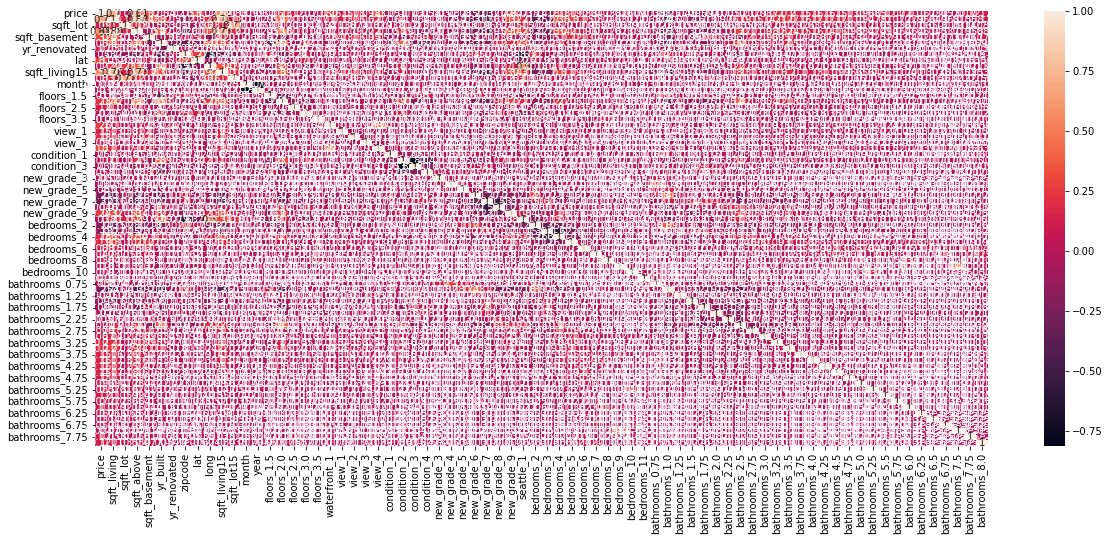

In [459]:
plt.figure(figsize=(20,8))
sns.heatmap(project2_data_df.corr(),annot = True)

In [460]:
project2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21596 non-null  float64
 1   sqft_living     21596 non-null  int64  
 2   sqft_lot        21596 non-null  int64  
 3   sqft_above      21596 non-null  int64  
 4   sqft_basement   21596 non-null  float64
 5   yr_built        21596 non-null  int64  
 6   yr_renovated    21596 non-null  float64
 7   zipcode         21596 non-null  int64  
 8   lat             21596 non-null  float64
 9   long            21596 non-null  float64
 10  sqft_living15   21596 non-null  int64  
 11  sqft_lot15      21596 non-null  int64  
 12  month           21596 non-null  int64  
 13  year            21596 non-null  int64  
 14  floors_1.5      21596 non-null  uint8  
 15  floors_2.0      21596 non-null  uint8  
 16  floors_2.5      21596 non-null  uint8  
 17  floors_3.0      21596 non-null 

In [461]:
#print(project2_data_df.columns.values)
project2_data1_df = project2_data_df.rename(columns={'floors_1.5' : 'floors_1_5'})
project2_data1_df = project2_data_df.rename(columns={'floors_2.0' : 'floors_2_0'})
print(project2_data_df.columns.values)
#y = project2_data_df['price']
#X = Project2_data_df.drop('price')
#OLS(endog exog = add_constant(x))

['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1.5' 'floors_2.0' 'floors_2.5' 'floors_3.0'
 'floors_3.5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0.75' 'bathrooms_1.0'
 'bathrooms_1.25' 'bathrooms_1.5' 'bathrooms_1.75' 'bathrooms_2.0'
 'bathrooms_2.25' 'bathrooms_2.5' 'bathrooms_2.75' 'bathrooms_3.0'
 'bathrooms_3.25' 'bathrooms_3.5' 'bathrooms_3.75' 'bathrooms_4.0'
 'bathrooms_4.25' 'bathrooms_4.5' 'bathrooms_4.75' 'bathrooms_5.0'
 'bathrooms_5.25' 'bathrooms_5.5' 'bathrooms_5.75' 'bathrooms_6.0'
 'bathrooms_6.25' 'bathrooms_6.5' 'bathrooms_6.75' 'ba

In [462]:
project2_data_df = project2_data_df.rename(columns={"floors_1.5" : "floors_1_5","floors_2.0" : "floors_2_0","floors_2.5" : "floors_2_5","floors_3.0" : "floors_3_0","floors_3.5" : "floors_3_5"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_0.75":"bathrooms_0_75","bathrooms_1.0":"bathrooms_1_0","bathrooms_1.25":"bathrooms_1_25","bathrooms_1.5":"bathrooms_1_5","bathrooms_1.75":"bathrooms_1_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_2.0":"bathrooms_2_0","bathrooms_2.25":"bathrooms_2_25","bathrooms_2.5":"bathrooms_2_5","bathrooms_2.75":"bathrooms_2_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_3.0":"bathrooms_3_0","bathrooms_3.25":"bathrooms_3_25","bathrooms_3.5":"bathrooms_3_5","bathrooms_3.75":"bathrooms_3_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_4.0":"bathrooms_4_0","bathrooms_4.25":"bathrooms_4_25","bathrooms_4.5":"bathrooms_4_5","bathrooms_4.75":"bathrooms_4_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_5.0":"bathrooms_5_0","bathrooms_5.25":"bathrooms_5_25","bathrooms_5.5":"bathrooms_5_5","bathrooms_5.75":"bathrooms_5_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_6.0":"bathrooms_6_0","bathrooms_6.25":"bathrooms_6_25","bathrooms_6.5":"bathrooms_6_5","bathrooms_6.75":"bathrooms_6_75"})
project2_data_df = project2_data_df.rename(columns={"bathrooms_7.5":"bathrooms_7_5","bathrooms_7.75":"bathrooms_7_75","bathrooms_8.0":"bathrooms_8_0"})
print(project2_data_df.columns.values)

['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1_5' 'floors_2_0' 'floors_2_5' 'floors_3_0'
 'floors_3_5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0_75' 'bathrooms_1_0'
 'bathrooms_1_25' 'bathrooms_1_5' 'bathrooms_1_75' 'bathrooms_2_0'
 'bathrooms_2_25' 'bathrooms_2_5' 'bathrooms_2_75' 'bathrooms_3_0'
 'bathrooms_3_25' 'bathrooms_3_5' 'bathrooms_3_75' 'bathrooms_4_0'
 'bathrooms_4_25' 'bathrooms_4_5' 'bathrooms_4_75' 'bathrooms_5_0'
 'bathrooms_5_25' 'bathrooms_5_5' 'bathrooms_5_75' 'bathrooms_6_0'
 'bathrooms_6_25' 'bathrooms_6_5' 'bathrooms_6_75' 'ba

In [463]:
import statsmodels.api as sm

In [464]:
project2_data_df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'year', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'waterfront_1', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'new_grade_3', 'new_grade_4', 'new_grade_5',
       'new_grade_6', 'new_grade_7', 'new_grade_8', 'new_grade_9', 'seattle_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5',
       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5',
       'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathro

In [470]:
project2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21596 non-null  float64
 1   sqft_living     21596 non-null  int64  
 2   sqft_lot        21596 non-null  int64  
 3   sqft_above      21596 non-null  int64  
 4   sqft_basement   21596 non-null  float64
 5   yr_built        21596 non-null  int64  
 6   yr_renovated    21596 non-null  float64
 7   zipcode         21596 non-null  int64  
 8   lat             21596 non-null  float64
 9   long            21596 non-null  float64
 10  sqft_living15   21596 non-null  int64  
 11  sqft_lot15      21596 non-null  int64  
 12  month           21596 non-null  int64  
 13  year            21596 non-null  int64  
 14  floors_1_5      21596 non-null  uint8  
 15  floors_2_0      21596 non-null  uint8  
 16  floors_2_5      21596 non-null  uint8  
 17  floors_3_0      21596 non-null 

In [466]:
y = project2_data_df['price']
X= project2_data_df.drop('price',1)
Xcont = sm.add_constant(X)
model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15520\282650282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= project2_data_df.drop('price',1)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              3223.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                        0.00
Time:                        10:58:21   Log-Likelihood:                     -2.9304e+05
No. Observations:               21596   AIC:                                  5.862e+05
Df Residuals:                   21523   BIC:                                  5.868e+05
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [467]:
input_list =  ['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year' 'floors_1_5' 'floors_2_0' 'floors_2_5' 'floors_3_0'
 'floors_3_5' 'waterfront_1' 'view_1' 'view_2' 'view_3' 'view_4'
 'condition_1' 'condition_2' 'condition_3' 'condition_4' 'new_grade_3'
 'new_grade_4' 'new_grade_5' 'new_grade_6' 'new_grade_7' 'new_grade_8'
 'new_grade_9' 'seattle_1' 'bedrooms_2' 'bedrooms_3' 'bedrooms_4'
 'bedrooms_5' 'bedrooms_6' 'bedrooms_7' 'bedrooms_8' 'bedrooms_9'
 'bedrooms_10' 'bedrooms_11' 'bathrooms_0_75' 'bathrooms_1_0'
 'bathrooms_1_25' 'bathrooms_1_5' 'bathrooms_1_75' 'bathrooms_2_0'
 'bathrooms_2_25' 'bathrooms_2_5' 'bathrooms_2_75' 'bathrooms_3_0'
 'bathrooms_3_25' 'bathrooms_3_5' 'bathrooms_3_75' 'bathrooms_4_0'
 'bathrooms_4_25' 'bathrooms_4_5' 'bathrooms_4_75' 'bathrooms_5_0'
 'bathrooms_5_25' 'bathrooms_5_5' 'bathrooms_5_75' 'bathrooms_6_0'
 'bathrooms_6_25' 'bathrooms_6_5' 'bathrooms_6_75' 'bathrooms_7_5'
 'bathrooms_7_75' 'bathrooms_8_0']
#
#OLS(endog = )

In [468]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = 'sqft_living + sqft_lot + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + month + year + floors_1_5 + floors_2_0 + floors_2_5 + floors_3_0 + floors_3_5 + waterfront_1 + view_1 + view_2 + view_3 + view_4 + condition_1 +condition_2 + condition_3 + condition_4 + new_grade_3 + new_grade_4 + new_grade_5 + new_grade_6 + new_grade_7 + new_grade_8 + new_grade_9 + seattle_1 + bedrooms_2 + bedrooms_3 + bedrooms_4 + bedrooms_5 + bedrooms_6 + bedrooms_7 + bedrooms_8 + bedrooms_9 + bedrooms_10 + bedrooms_11 + bathrooms_0_75 + bathrooms_1_0 + bathrooms_1_25 +bathrooms_1_5 +bathrooms_1_75 + bathrooms_2_0 + bathrooms_2_25 +bathrooms_2_5 +bathrooms_2_75 + bathrooms_3_0 + bathrooms_3_25 +bathrooms_3_5 +bathrooms_3_75 + bathrooms_4_0 + bathrooms_4_25 +bathrooms_4_5 +bathrooms_4_75 + bathrooms_5_0 + bathrooms_5_25 + bathrooms_5_5 +bathrooms_5_75 + bathrooms_6_0 + bathrooms_6_25 + bathrooms_6_5 +bathrooms_6_75 + bathrooms_7_5 +bathrooms_7_75 + bathrooms_8_0  ' 
#predictors = 'sqft_living + sqft_lot + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + month + year + floors_1_5 + floors_2_0 + floors_2_5 + floors_3_0 + floors_3_5 + waterfront_1 + view_1 + view_2 + view_3 + view_4 + condition_1 +condition_2 + condition_3 + condition_4 + new_grade_3 + new_grade_4 + new_grade_5 + new_grade_6 + new_grade_7 + new_grade_8 + new_grade_9 +      '  ' 
#predictors = 'sqft_living + sqft_lot + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + month + year + floors_1_5 + floors_2_0 + floors_2_5 + floors_3_0 + floors_3_5 + waterfront_1 + view_1 + view_2 + view_3 + view_4 + condition_1 +condition_2 + condition_3 + condition_4 + new_grade_3 + new_grade_4 + new_grade_5 + new_grade_6 + new_grade_7 + new_grade_8 + new_grade_9 +      ' ' 
#predictors = 'sqft_living + sqft_lot + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + month + year + floors_1_5 + floors_2_0 + floors_2_5 + floors_3_0 + floors_3_5 + waterfront_1 + view_1 + view_2 + view_3 + view_4 + condition_1 +condition_2 + condition_3 + condition_4 + new_grade_3 + new_grade_4 + new_grade_5 + new_grade_6 + new_grade_7 + new_grade_8 + new_grade_9 +      ' 
#predictors = 'bedrooms_4 + bedrooms_8'
formula = outcome + '~' + predictors
model = ols(formula=formula, data=project2_data_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     817.8
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:58:21   Log-Likelihood:            -2.9304e+05
No. Observations:               21596   AIC:                         5.862e+05
Df Residuals:                   21522   BIC:                         5.868e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.008e+07   9.55e+06     -3.149      0.002   -4.88e+07   -1.14e+07
sqft_living       87.0804     17.333      5.024      0.000      53.107     121.054
sqft_lot           0.1210      0.045      2.671      0.008       0.032       0.210
sqft_above        64.7365     17.389      3.723      0.000      30.652      98.821
sqft_basement     47.4248     17.188      2.759      0.006      13.734      81.115
yr_built       -1533.2044     77.820    -19.702      0.000   -1685.737   -1380.672
yr_renovated      39.0842      3.786     10.324      0.000      31.664      46.504
zipcode         -879.9257     33.670    -26.134      0.000    -945.920    -813.931
lat             5.948e+05   1.03e+04     57.880      0.000    5.75e+05    6.15e+05
long           -1.334e+05    1.3e+04    -10.226      0.000   -1.59e+05   -1.08e+05
sqft_living15     51.2893      3.351     15.305      0.000      44.721      57.858
sqft_lot15        -0.4603      0.069     -6.641      0.000      -0.596      -0.324
month           1416.8488    665.829      2.128      0.033     111.775    2721.923
year            3.729e+04   4443.723      8.391      0.000    2.86e+04     4.6e+04
floors_1_5      8523.0939   5188.928      1.643      0.100   -1647.589    1.87e+04
floors_2_0      5779.7138   4426.311      1.306      0.192   -2896.184    1.45e+04
floors_2_5      1.378e+05   1.57e+04      8.793      0.000    1.07e+05    1.69e+05
floors_3_0      2.653e+04   9380.330      2.828      0.005    8144.517    4.49e+04
floors_3_5      1.921e+05   7.23e+04      2.657      0.008    5.04e+04    3.34e+05
waterfront_1    5.629e+05   1.93e+04     29.106      0.000    5.25e+05    6.01e+05
view_1           7.06e+04   6509.153     10.846      0.000    5.78e+04    8.34e+04
view_2          1.322e+05   8920.648     14.820      0.000    1.15e+05     1.5e+05
view_3          1.152e+05   1.07e+04     10.771      0.000    9.43e+04    1.36e+05
view_4          2.624e+05   1.35e+04     19.478      0.000    2.36e+05    2.89e+05
condition_1      7.28e+04   3.82e+04      1.905      0.057   -2104.339    1.48e+05
condition_2     7.809e+04   3.56e+04      2.197      0.028    8407.882    1.48e+05
condition_3     1.137e+05   3.56e+04      3.198      0.001     4.4e+04    1.83e+05
condition_4     1.608e+05   3.58e+04      4.495      0.000    9.07e+04    2.31e+05
new_grade_3     -2.03e+05   1.92e+05     -1.059      0.290   -5.79e+05    1.73e+05
new_grade_4    -3.829e+05   3.97e+04     -9.634      0.000   -4.61e+05   -3.05e+05
new_grade_5    -4.122e+05   1.56e+04    -26.358      0.000   -4.43e+05   -3.82e+05
new_grade_6     -4.01e+05   9783.049    -40.991      0.000    -4.2e+05   -3.82e+05
new_grade_7     -3.55e+05   8017.453    -44.280      0.000   -3.71e+05   -3.39e+05
new_grade_8    -2.973e+05   7159.747    -41.530      0.000   -3.11e+05   -2.83e+05
new_grade_9 

In [469]:
#pd.get_dummies(project2_raw_df.new_grade,prefix ='grade')